<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_Sinusoidal_equation_problem_linearRegression_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# lets try a sinusoidal linear regression problem y = sin(x)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

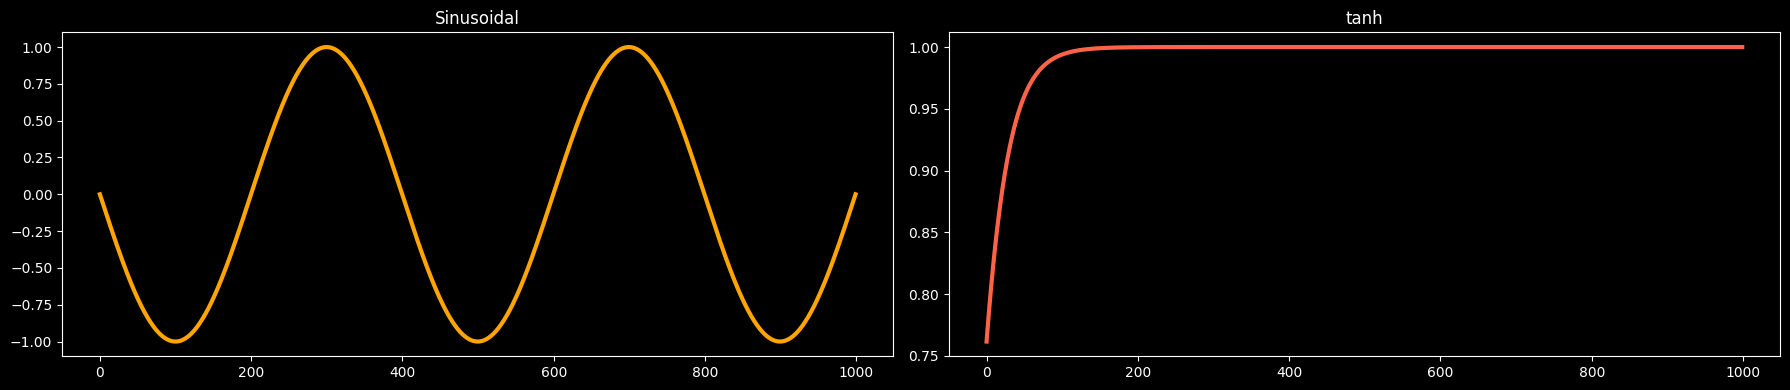

In [ ]:
#lets compare sinusoidal and tanh functions
points = np.linspace(-20, 30, 1000)
points = np.linspace(0, -5*np.pi, 1000)
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.lineplot(np.sin(points), color='orange', linewidth=3)
plt.title('Sinusoidal')
plt.subplot(1,2,2)
sns.lineplot(np.tanh(np.linspace(1,20,1000)),color='tomato', linewidth=3)
plt.title('tanh')
plt.tight_layout()
plt.show()

In [ ]:
#create the input and output data y = sin(x)
X = np.linspace(-20, 30, 1000)
X = np.linspace(0, -5*np.pi, 1000)
y = np.sin(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.min(), X_train.max(), y_test.min(), y_test.max()

(-15.707963267948966, 0.0, -0.9999987638285974, 0.9999394282002937)

# modelling

<Axes: >

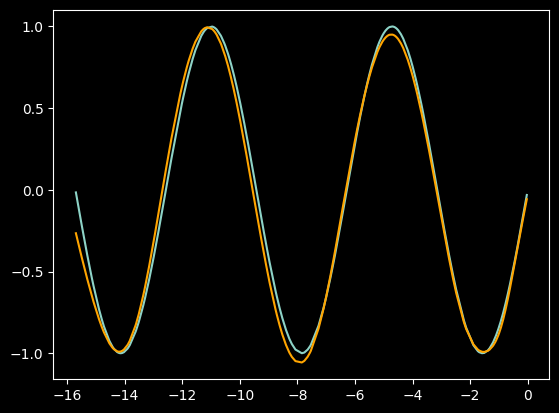

In [ ]:
# instantiate the model and add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=1))
model.add(tf.keras.layers.Dense(32,tf.keras.activations.swish))
# model.add(tf.keras.layers.Dense(32,tf.keras.activations.tanh))
# model.add(tf.keras.layers.Dense(32,tf.keras.activations.tanh))
# model.add(tf.keras.layers.Dense(32,tf.keras.activations.tanh))
# model.add(tf.keras.layers.Dense(32,tf.keras.activations.tanh))
model.add(tf.keras.layers.Dense(32,tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.linear))

# compile the model: check for error, optimize the error and generate an accuracy report
model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = tf.keras.metrics.mae
)

# fit the model, predict and evaluate
history = model.fit(X_train, y_train, epochs=200, verbose=0)

y_pred = model.predict(X_test, verbose=0)
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=y_pred.reshape(-1), color='orange')